In [345]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import csv
import scipy.stats as st
import seaborn as sns
import numpy as np

In [346]:
# Specify the file path
file_path = '../data/cleaned/generic_butcher_cleaned.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
display(df)

,product_name,date_time,measured_weight,measured_height
0,13 oz Ribeye Tail A,2024-06-03 07:16:28,16.76,1.62952
1,13 oz Ribeye Tail A,2024-06-03 07:16:47,16.12,1.02086
2,16 oz Ribeye Tail A,2024-06-03 07:17:36,16.34,1.03975
3,16 oz Ribeye Tail A,2024-06-03 07:17:53,16.16,1.05378
4,16 oz Ribeye Tail A,2024-06-03 07:18:08,16.12,1.03522
...,...,...,...,...
34351,7 oz S Sirloin A,2024-06-28 22:58:13,6.82,1.25516
34352,7 oz S Sirloin A,2024-06-28 22:58:23,6.86,1.29131
34353,7 oz S Sirloin A,2024-06-28 22:58:36,6.94,1.36985
34354,7 oz S Sirloin A,2024-06-28 22:59:01,6.80,1.32573


In [347]:
file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(file_path2)

# Display the DataFrame
df2.head(2)

,product_name,weight_min,weight_max,thick_min,thick_max
0,10 oz Sirloin A,9.12,10.12,1.1,1.75
1,11 oz Sirloin B,10.08,11.08,1.1,1.75


In [348]:
#separate 1 product from remainder 
#find stdev, mean, max, and min throw into chart (will serve this with the histgram)
#determine bin widths
#determine max/ min of x axis (dynamic)
#min/max of y axis (dynamic)
#create variables of mean and the specs to throw vertical lines to the x-axis
    #this means merging tables###
#find outliers

In [349]:
df2['product_name']

0             10 oz  Sirloin A
1             11 oz  Sirloin B
2             11 oz  Sirloin C
3         13 oz  Ribeye Tail A
4               16 oz  Strip A
5      16 oz  Dry Age Ribeye A
6         16 oz  Prime Strip A
7         16 oz  Ribeye Tail A
8              18 oz  Ribeye A
9        20 oz  Prime Ribeye A
10        22 oz  Porterhouse A
11        3.5 oz Tender Bits A
12    4 oz T Tenderloin Tail A
13            5 oz S Sirloin A
14            5 oz S Sirloin B
15            6 oz S Sirloin A
16            6 oz S Sirloin B
17         6 oz T Tenderloin A
18            7 oz S Sirloin A
19            7 oz S Sirloin B
20         7 oz T Tenderloin A
21          8 oz P Pork Chop A
22            8 oz S Sirloin A
23            8 oz S Sirloin B
24         8 oz T Tenderloin A
25            9 oz S Sirloin A
26         9 oz T Tenderloin A
Name: product_name, dtype: object

In [350]:


product_name = "4 oz T Tenderloin Tail A"
product_data = df.loc[df["product_name"] == product_name]
product=product_data.copy()
product

,product_name,date_time,measured_weight,measured_height
9377,4 oz T Tenderloin Tail A,2024-06-10 13:18:41,3.84,0.888062
9378,4 oz T Tenderloin Tail A,2024-06-10 13:18:46,4.12,1.229480
9379,4 oz T Tenderloin Tail A,2024-06-10 13:18:54,4.10,0.985698
9380,4 oz T Tenderloin Tail A,2024-06-10 13:19:00,3.72,0.985606
9381,4 oz T Tenderloin Tail A,2024-06-10 13:19:06,3.78,0.816691
...,...,...,...,...
32441,4 oz T Tenderloin Tail A,2024-06-27 13:45:58,3.52,1.310800
32442,4 oz T Tenderloin Tail A,2024-06-27 13:46:04,3.65,0.796434
32443,4 oz T Tenderloin Tail A,2024-06-27 13:46:11,3.68,1.427200
32444,4 oz T Tenderloin Tail A,2024-06-27 13:46:19,3.94,1.148720


In [351]:
##do another loc here to get rid of IQR values 
product.describe()


,measured_weight,measured_height
count,909.000000,909.000000
mean,3.885622,1.032980
std,0.251349,0.126491
min,3.210000,0.697441
25%,3.700000,0.942516
50%,3.860000,1.024490
75%,4.040000,1.105640
max,6.240000,1.652560


In [352]:
product = product[["product_name","date_time","measured_weight"]]
drop_data = product.loc[product['measured_weight']>=50].index
product = product.drop(drop_data)

In [341]:
min_wt = np.min(product['measured_weight'])
max_wt = np.max(product['measured_weight'])
binmin = np.floor(min_wt)
binmax = np.ceil(max_wt)

In [342]:
l_limit = df2.loc[df2['product_name']==product_name,'weight_min']
u_limit = df2.loc[df2['product_name']==product_name,'weight_max']

In [343]:
weight_min_spec = (df2.loc[df2['product_name']==product_name,'weight_min']).iloc[0]
weight_max_spec = (df2.loc[df2['product_name']==product_name,'weight_max']).iloc[0]
weight_avg = np.mean(product['measured_weight'])


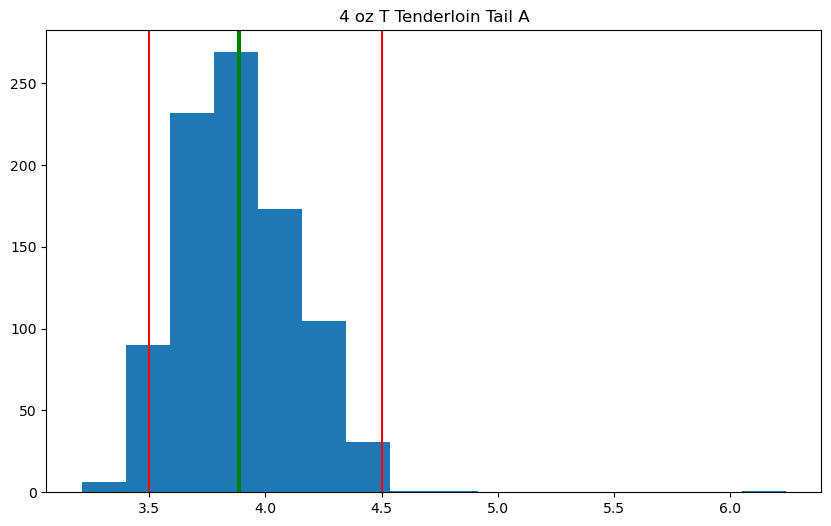

In [344]:
num_bins = int((binmax-binmin)*(1/.25))

product = product['measured_weight']

plt.figure(figsize=(10,6))
plt.hist(product,bins=num_bins)
plt.axvline(weight_avg, color="green", linewidth= 3)
plt.axvline(weight_min_spec, color="red")
plt.axvline(weight_max_spec, color="red")
plt.title(product_name)


plt.show()